In [25]:
%matplotlib inline
from modsim import *

In [26]:
m = UNITS.meter
s = UNITS.second
kg = UNITS.kilogram
N = UNITS.newton
degrees = UNITS.degree

In [27]:
init = State(y = 0 ,
            v = 0 )

In [28]:
duration = 0.008 
dt = 0.001 
ts = linrange(0,duration, dt)

In [56]:
system = System(mass = 78,
               g = 9.8 ,
               k = 28500 ,
               y_init = 0 ,
               ts=ts,
               length  = 1,
               init= init,
               delta_l= .0007
               )

In [57]:
def spring_force(y,length, k):
    l = length - delta_l
    F_s = k * l
    return F_s

In [58]:
"""def slope_func(state, t, system):
    y, v, a , change_in_spring = state
    unpack(system)
    
    F_g =  mass * g
    F_n = F_g
    delta_x = change_in_spring - y
    F_s = k * (delta_x)
    F_total = -F_g + F_n + F_s
    
    dydt = v
    dvdt = F_total / mass
    y =  1/2*dvdt*(t**2)
    
    return dydt, dvdt, change_in_spring, y
    
    """

'def slope_func(state, t, system):\n    y, v, a , change_in_spring = state\n    unpack(system)\n    \n    F_g =  mass * g\n    F_n = F_g\n    delta_x = change_in_spring - y\n    F_s = k * (delta_x)\n    F_total = -F_g + F_n + F_s\n    \n    dydt = v\n    dvdt = F_total / mass\n    y =  1/2*dvdt*(t**2)\n    \n    return dydt, dvdt, change_in_spring, y\n    \n    '

In [63]:
def slope_func(state, t, system):
    y, v = state
    unpack(system)
    F_s = spring_force(y, length, k)
    a_spring = F_s / mass
    if (y==0):
        dvdt = -g + g + a_spring
        
        return dydt, dvdt
    else:
        dvdt= a_spring - g
        return dydt, dvdt

In [64]:
run_odeint(system, slope_func)

Before running scipy.integrate.odeint, I tried
                 running the slope function you provided with the
                 initial conditions in system and t=0, and I got
                 the following error:


ValueError: too many values to unpack (expected 2)

In [61]:
system.results.tail()

,y,v,change_in_spring,a
0.004,0.0,0.0,0.0007,0.0
0.005,0.0,0.0,0.0007,0.0
0.006,0.0,0.0,0.0007,0.0
0.007,0.0,0.0,0.0007,0.0
0.008,0.0,0.0,0.0007,0.0


In [45]:
ys = system.results.y


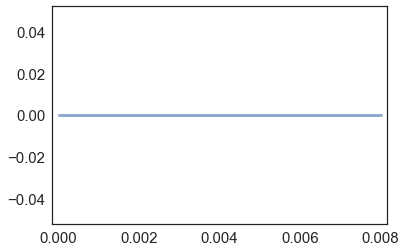

In [46]:
plot(ys)